<a href="https://colab.research.google.com/github/SSrishti-14/srishtisreyaADLab/blob/main/ADL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Q2

In [ ]:
data = pd.read_csv('house_data.csv')

In [ ]:
data.head()

,House_Size,House_Price
0,374.540119,116714.389066
1,950.714306,270263.924400
2,731.993942,224186.221370
3,598.658484,80219.099529
4,156.018640,35821.997741


Q3

In [ ]:
missing_values = data.isnull().sum()

In [ ]:
print(missing_values)

House_Size     0
House_Price    0
dtype: int64


Q4

In [ ]:
#Generate descriptive statistics
descriptive_stats = data.describe()

In [ ]:
print(descriptive_stats)

       House_Size    House_Price
count  100.000000     100.000000
mean   470.180743  141000.205005
std    297.489411   93956.895853
min      5.522117  -38096.894236
25%    193.200761   65139.721461
50%    464.142455  133802.788924
75%    730.203119  214881.918906
max    986.886937  352219.753320


Q5

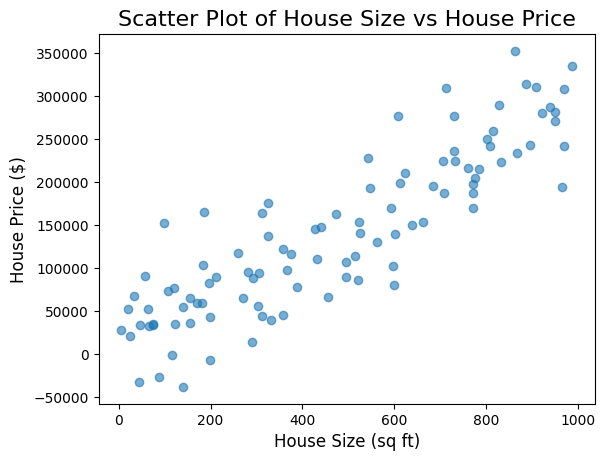

In [ ]:
#using matplot
plt.scatter(data['House_Size'], data['House_Price'], alpha=0.6)
plt.title('Scatter Plot of House Size vs House Price', fontsize=16)
plt.xlabel('House Size (sq ft)', fontsize=12)
plt.ylabel('House Price ($)', fontsize=12)
plt.show()


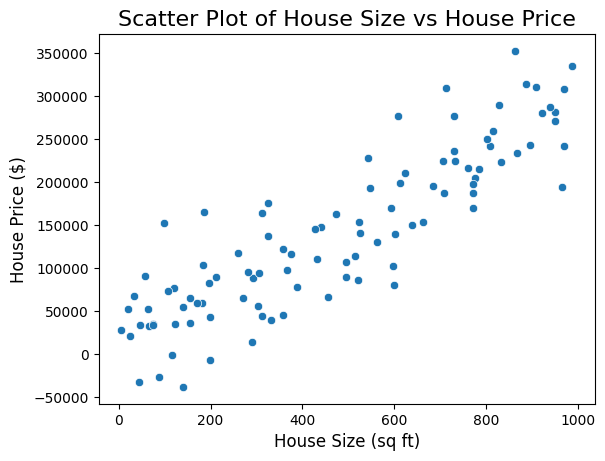

In [ ]:
#using seaborn
sns.scatterplot(data=data, x='House_Size', y='House_Price')
plt.title('Scatter Plot of House Size vs House Price', fontsize=16)
plt.xlabel('House Size (sq ft)', fontsize=12)
plt.ylabel('House Price ($)', fontsize=12)
plt.show()

Q6

In [ ]:
Q1 = data['House_Price'].quantile(0.25) #25th quartile of data
Q3 = data['House_Price'].quantile(0.75) #75th quartile of data
IQR = Q3 - Q1
#defining the tukey fences
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#values greater than upper bound and lesser than lower bound are outliers
outliers = data[(data['House_Price'] < lower_bound) | (data['House_Price'] > upper_bound)]
print(f"Number of outliers in House_Price: {len(outliers)}")
print(outliers)

Number of outliers in House_Price: 0
Empty DataFrame
Columns: [House_Size, House_Price]
Index: []


In [ ]:
#we clean the rest data that doesnt contain in this interval
data_clean = data[(data['House_Price'] >= lower_bound) & (data['House_Price'] <= upper_bound)]
print(f"Number of rows after removing outliers: {len(data_clean)}")


Number of rows after removing outliers: 100


Q7

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['House_Size_Normalized'] = scaler.fit_transform(data[['House_Size']])
print("Dataset after applying Min-Max Scaling:")
print(data[['House_Size', 'House_Size_Normalized']].head())

Dataset after applying Min-Max Scaling:
   House_Size  House_Size_Normalized
0  374.540119               0.376025
1  950.714306               0.963140
2  731.993942               0.740267
3  598.658484               0.604399
4  156.018640               0.153354


Q8

In [ ]:
#we have split the data here into 80% and 20% split
from sklearn.model_selection import train_test_split
x = data['House_Size'].values.reshape(-1,1)
y = data['House_Price'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Q9

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print(f'Intercept: {model.intercept_}')
print(f'slope: {model.coef_[0]}')

Intercept: [7145.66597293]
slope: [279.93236575]


In [ ]:
y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = model.score(x_test, y_test)
print(f'R-squared: {r2}')

Mean Squared Error: 1634248784.2925048
R-squared: 0.8072059636181392


Q10

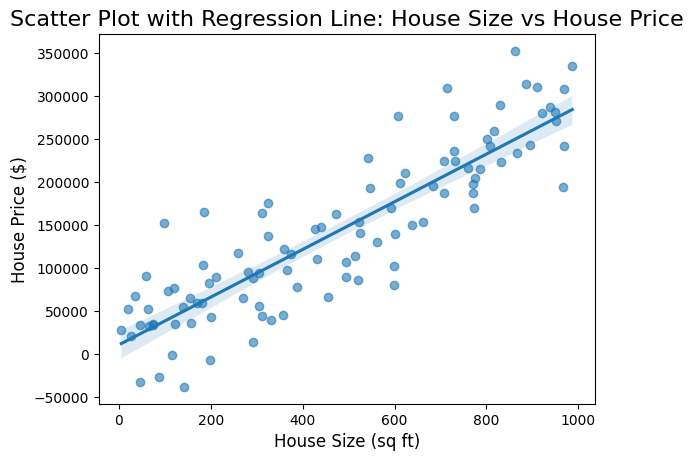

In [ ]:
sns.regplot(x='House_Size', y='House_Price', data=data, scatter_kws={'alpha': 0.6})
plt.title('Scatter Plot with Regression Line: House Size vs House Price', fontsize=16)
plt.xlabel('House Size (sq ft)', fontsize=12)
plt.ylabel('House Price ($)', fontsize=12)
plt.show()